# Gráficando la información

[Make plots of Series or DataFrame.](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot)

In [14]:
import pandas as pd
pd.options.display.float_format = '{:_.2f}'.format

df = pd.read_csv('files/covid_19_data.csv').sort_values(by=['Country/Region'])
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

print(df.columns)

df = df[['ObservationDate', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered']]
df.head(4)


Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')


,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
2737,2020-02-28,Azerbaijan,1.00,0.00,0.00
4770,2020-03-10,"('St. Martin',)",2.00,0.00,0.00
44930,2020-06-18,Afghanistan,27_536.00,550.00,7_660.00
4467,2020-03-09,Afghanistan,7.00,0.00,0.00


País donde más se generan casos de coronavirus

In [15]:
df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False)

Country/Region
France                  5_863_138.00
India                   5_713_215.00
Turkey                  5_235_978.00
UK                      3_910_803.00
US                      3_788_713.00
                            ...     
Micronesia                      1.00
North Ireland                   1.00
Republic of the Congo           1.00
 Azerbaijan                     1.00
China                           0.00
Name: Confirmed, Length: 229, dtype: float64

In [16]:
df_time_france = df.groupby(['Country/Region',pd.Grouper(key='ObservationDate', freq = '1D')]).sum().loc['France']
df_time_france

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-24,2.00,0.00,0.00
2020-01-25,3.00,0.00,0.00
2020-01-26,3.00,0.00,0.00
2020-01-27,3.00,0.00,0.00
2020-01-28,4.00,0.00,0.00
...,...,...,...
2021-05-25,5_670_486.00,109_040.00,386_798.00
2021-05-26,5_683_143.00,109_185.00,388_128.00
2021-05-27,5_697_076.00,109_327.00,389_105.00


<AxesSubplot:title={'center':'COVID-19 FRANCE'}, xlabel='ObservationDate'>

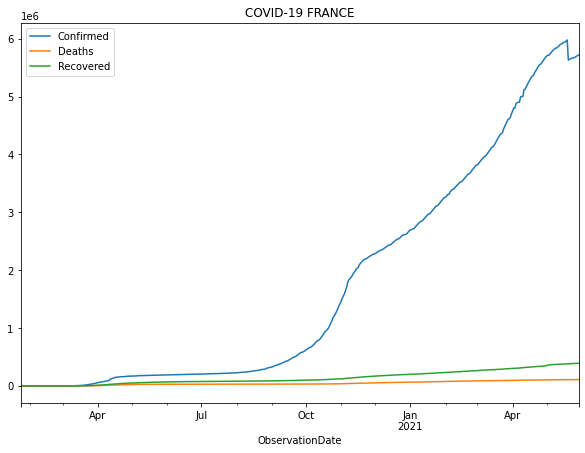

In [17]:
df_time_france.plot(figsize=(10,7), title='COVID-19 FRANCE')

Text(0, 0.5, 'People')

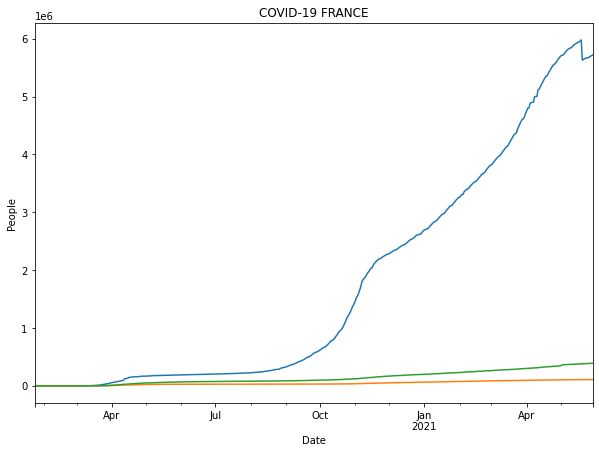

In [18]:
import matplotlib.pyplot as plt

df_time_france.plot(figsize=(10,7), title='COVID-19 FRANCE', legend=False)
plt.xlabel('Date')
plt.ylabel('People')

In [19]:
df_time_france_monthly = df_time_france.resample('m').sum()
df_time_france_monthly

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,30.00,0.00,0.00
2020-02-29,466.00,19.00,102.00
2020-03-31,407_291.00,21_318.00,52_944.00
2020-04-30,3_722_085.00,486_658.00,952_305.00
2020-05-31,5_601_196.00,845_395.00,1_865_099.00
2020-06-30,5_914_824.00,883_625.00,2_193_201.00
2020-07-31,6_640_187.00,932_591.00,2_456_195.00
2020-08-31,8_150_489.00,943_557.00,2_607_525.00
2020-09-30,13_600_511.00,934_708.00,2_763_282.00


<AxesSubplot:xlabel='ObservationDate'>

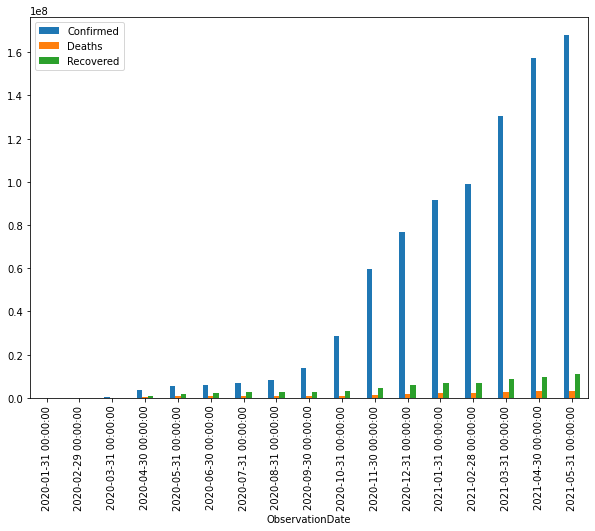

In [20]:
df_time_france_monthly.plot(figsize=(10,7),kind='bar')

### Caso de estudio

In [21]:
df_colombia = df[df['Country/Region'] == 'Colombia'].sort_values(by='ObservationDate').reset_index(drop=True)
df_colombia

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-23,Colombia,0.00,0.00,0.00
1,2020-03-06,Colombia,1.00,0.00,0.00
2,2020-03-07,Colombia,1.00,0.00,0.00
3,2020-03-08,Colombia,1.00,0.00,0.00
4,2020-03-09,Colombia,1.00,0.00,0.00
...,...,...,...,...,...
12498,2021-05-29,Colombia,11_822.00,478.00,11_022.00
12499,2021-05-29,Colombia,951_083.00,18_683.00,869_117.00
12500,2021-05-29,Colombia,70_734.00,1_465.00,66_928.00
12501,2021-05-29,Colombia,66_128.00,1_556.00,62_052.00


In [22]:
df_colombia_time = df_colombia.groupby(pd.Grouper(key='ObservationDate', freq = 'w')).sum()
df_colombia_time


,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-26,0.00,0.00,0.00
2020-02-02,0.00,0.00,0.00
2020-02-09,0.00,0.00,0.00
2020-02-16,0.00,0.00,0.00
2020-02-23,0.00,0.00,0.00
...,...,...,...
2021-05-02,19_889_869.00,512_178.00,18_558_953.00
2021-05-09,20_667_691.00,535_300.00,19_402_169.00
2021-05-16,21_469_844.00,558_464.00,20_127_210.00


In [23]:
df_colombia_time = df_colombia_time.diff()
df_colombia_time

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-26,NaN,NaN,NaN
2020-02-02,0.00,0.00,0.00
2020-02-09,0.00,0.00,0.00
2020-02-16,0.00,0.00,0.00
2020-02-23,0.00,0.00,0.00
...,...,...,...
2021-05-02,844_418.00,21_948.00,787_525.00
2021-05-09,777_822.00,23_122.00,843_216.00
2021-05-16,802_153.00,23_164.00,725_041.00


In [24]:
# df_colombia_time.drop(df_colombia_time.tail(1).index, inplace=True)
df_colombia_time = df_colombia_time[1:-1]
df_colombia_time

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-02-02,0.00,0.00,0.00
2020-02-09,0.00,0.00,0.00
2020-02-16,0.00,0.00,0.00
2020-02-23,0.00,0.00,0.00
2020-03-01,0.00,0.00,0.00
...,...,...,...
2021-04-25,826_235.00,19_751.00,743_906.00
2021-05-02,844_418.00,21_948.00,787_525.00
2021-05-09,777_822.00,23_122.00,843_216.00


In [25]:
df_colombia_time = df_colombia_time[['Confirmed','Deaths']]
df_colombia_time

,Confirmed,Deaths
ObservationDate,,
2020-02-02,0.00,0.00
2020-02-09,0.00,0.00
2020-02-16,0.00,0.00
2020-02-23,0.00,0.00
2020-03-01,0.00,0.00
...,...,...
2021-04-25,826_235.00,19_751.00
2021-05-02,844_418.00,21_948.00
2021-05-09,777_822.00,23_122.00


<AxesSubplot:xlabel='ObservationDate', ylabel='Muertes por semana'>

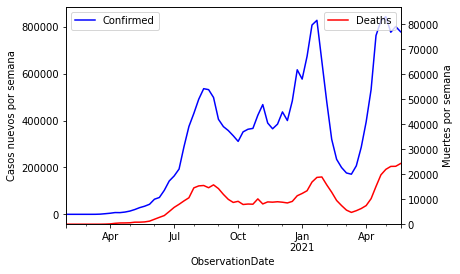

In [72]:
df_colombia_time['Confirmed'].plot(legend=True, style = 'b', ylabel='Casos nuevos por semana')
plt.twinx()
df_colombia_time['Deaths'].plot(legend=True, style = 'r', ylim=[0,87000], ylabel='Muertes por semana')